# SailGP Data Analyst Challenge

The aim is to test you python abilities. The challenge is to analyze the data provided and answer the questions below. You can use any library you want to help you with the analysis. The data is from the SailGP event in Auckland 2025. The data is in the 'DATA' folder.

There are various sources available.

The Boat Logs are in the 'Boat_Logs' folder. The data is in csv format and the columns are described in the 'Boat_Logs/Boat_Logs_Columns.csv' file.
The 'Course_Marks_2025-01-19.csv' file contains the mark positions and wind reading on the course for the whole day.

The Race_XML folder contains the xml files for each race that contains information on where the boundaries of the course are, the theoretical position of the marks and the target racecourse axis.

The 2025-01-19_man_summary.csv file contains the metrics from the manoeuvre summary for the day.
The 2025-01-19_straight_lines.csv file contains the metrics from the straight line summary for the day.

Both are derived from the boat logs.

The 2502 m8_APW_HSB2_HSRW.kph.csv file contains the polar data for the boats in that config.

## Requierements
- Chose at least 3 questions from the list below to answer.
- Python 3.8 or higher
- Notebook should be able to run without any errors from start to finish.
- Specify the libraries (imports) used in the notebook.
- Any comments to make the notebook self-explanatory and easy to follow would be appreciated.
- If you can't get to the end of a question, we would appreciate the code you have written so far and explain what you were trying to do.

## Further information:
- We usually use bokeh for visualizations. So any showcase of bokeh would be appreciated.
-

## Submitting the results.
It would be great if you could provide a jupyter notebook with the code and the results of the analysis. You can submit the results by sharing a link to a git repository.


### Imports and re-used functions
Free section to initialize the notebook with the necessary imports and functions that will be used in the notebook.



In [7]:
#!git clone https://github.com/DrSailGP/SGP_Data_Challenge.git
!cd SGP_Data_Challenge

In [8]:
pip install pandas numpy bokeh matplotlib scipy bs4 folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
#!jupyter notebook main_final.ipynb 

## Question 1: Write a Python function that can take a compass direction (ie. TWD or Heading) and calculate an accurate mean value across a downsampled frequency. Eg. If TWD is at 1Hz, give me a 10s average.

In [11]:
import pandas as pd
import numpy as np 

def downsampled_mean (compass_dir, og_frequency, dwnsmpl_freq):
    '''
    Parameters:
    compass_dir = compass direction (i.e. TWD or Heading) in degrees 
    og_frequency = original frequency of compass_dir in Hz(i.e. 1 for 1Hz)
    dwnsmpl_freq = time period you want the downsampled frequency average to be (i.e. 10 for 10s interval) 
    '''
    means = []
    
    for i in range (0, len(compass_dir), (og_frequency*dwnsmpl_freq)): #iterate through compass_dir for the corresponding downsample period
        ds = compass_dir[i:i + (og_frequency*dwnsmpl_freq)] #extract array with number of compass_dir elements for downsample average 
        ds_mean = np.mean(ds) #mean of the compass_dir downsample frequency
        means.append(round(ds_mean,2)) #adds all means calculated to the mean list
    return means

The function can be tested below using BRA's dataset in the repository 

In [13]:
# Example Use
## Brazil's Heading over the day from 1Hz downsampled to 10s averages    
BRA = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_BRA.csv')
compass_dir = BRA['HEADING_deg']

#Heading_deg is at 1Hz, downsample to the 10s average.
downsampled_mean(compass_dir, 1, 10)

[101.54,
 111.77,
 111.73,
 105.14,
 105.03,
 114.75,
 108.1,
 111.53,
 89.0,
 41.41,
 31.68,
 18.48,
 271.02,
 331.21,
 323.99,
 284.77,
 276.95,
 238.46,
 203.83,
 217.09,
 217.74,
 230.9,
 227.18,
 157.28,
 105.0,
 94.3,
 96.66,
 109.44,
 96.49,
 21.26,
 26.26,
 24.85,
 27.33,
 23.65,
 17.13,
 94.66,
 146.23,
 200.08,
 206.91,
 226.16,
 298.67,
 287.88,
 277.61,
 267.03,
 271.4,
 298.04,
 101.94,
 26.08,
 21.87,
 71.38,
 119.58,
 106.53,
 99.88,
 108.3,
 113.81,
 113.42,
 89.53,
 249.38,
 144.26,
 298.74,
 266.3,
 267.16,
 255.6,
 209.96,
 214.7,
 213.34,
 167.78,
 118.72,
 86.25,
 66.06,
 88.38,
 88.5,
 85.85,
 93.45,
 107.78,
 115.08,
 117.98,
 121.87,
 121.13,
 115.5,
 71.85,
 17.55,
 20.13,
 245.6,
 336.83,
 337.52,
 285.28,
 286.65,
 265.47,
 208.33,
 216.83,
 216.76,
 220.49,
 181.29,
 125.76,
 50.24,
 18.94,
 14.61,
 19.85,
 25.26,
 22.33,
 43.63,
 107.78,
 116.1,
 102.14,
 106.58,
 68.96,
 60.47,
 121.96,
 275.92,
 265.39,
 266.76,
 266.62,
 225.61,
 204.82,
 212.79,
 200.07

## Question 2: Given a course XML and a timeseries of boat Lat/Lon values, calculate a VMC column for the same timeseries.


In [15]:
# from bs4 import BeautifulSoup
# import math 

# #Find coordinates for each leg of the course by finding Marks and Corners using an XML file 
# def find_mark(XML_file):
   
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')
        
#     mark_coords = {} 
#     course = []
#     legs = []

#     #Find each Mark's Lat and Lon existing under CompoundMark and combine to create coordinate and add to corrdinate list
#     all_marks = soup.find("CompoundMark") #find first Compound Mark 
#     while all_marks:
#         mark = all_marks.find("Mark") #find the first Mark under Compound Mark
#         while mark:
#             ID_mark = mark.get('CompoundMarkID') #find the ID of the Mark 
#             lat = mark.get('TargetLat') #take the Lon 
#             lon = mark.get('TargetLng') #take the Lat 

#             if ID_mark and lat and lon: #combine Lat and Lon to make coordiante for Mark 
#                 mark_coords[ID_mark] = (float(lat), float(lon))

#             mark = mark.find_next_sibling("Mark") #move to the next Mark

#         all_marks = all_marks.find_next_sibling("CompoundMark") #move to the next CompoundMark

#     #Find the Corners in the XLM and add to coordinates list 
#     for corner in soup.find_all("Corner"): #finds Corners
#         ID_mark = corner.get('CompoundMarkID') #find the ID of Corner 
#         if ID_mark in mark_coords: #check if this ID just found is in the IDs of coordinates of marks found
#             course.append(mark_coords[ID_mark]) #if ID is in coordinates of marks add this value to course list 

#     #Find the first and second mark to create leg     
#     for i in range(len(course) - 1): #loop through course list
#         last_mark = course[i] #last mark sailed
#         next_mark = course[i + 1] #next mark sailing to 
#         legs.append((last_mark, next_mark)) #add the first and second mark of each leg found to legs list 
        
#     return legs

# #Create functions to calculate distance and heading from Lat/Lon values to help make final VMC calculation easier

# #Calculate the distance between coodinates using the Spherical Law of Cosines
# def distance(coord1, coord2):
#     lat1, lon1 = map(math.radians, coord1) #convert coordiante 1 from deg to radians
#     lat2, lon2 = map(math.radians, coord2) #convert coordiante 2 from deg to radians
    
#     diff_lon = lon2 - lon1 #calc differnce in long

#     #Apply SLC 
#     dist = math.acos(math.sin(lat1) * math.sin(lat2) + 
#                      math.cos(lat1) * math.cos(lat2) * math.cos(diff_lon)) * 6371 #earth radius in km

#     return round(dist, 3) 

# #Calculate Heading in deg
# def heading(coord1, coord2):
#     lat1, lon1 = map(math.radians, coord1) #convert coordiante 1 from deg to radians
#     lat2, lon2 = map(math.radians, coord2) #convert coordiante 1 from deg to radians

#     diff_lon = lon2 - lon1 #calc differnce in long

#     #Calc x and y components of heading vector
#     x = math.sin(diff_lon) * math.cos(lat2)
#     y = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(diff_lon)

#     heading = math.atan2(x,y) #calc heading 
    
#     return round((math.degrees(heading) + 360) % 360,) #convert heading from radians to deg 

# #Calculate VMC column
# def VMC(time_lat_lon, lat_lon_target):
    
#     vmc = []

#     #Loop through timeseries of boat Lat/Lon and pick each out as a (time, lat, lon) point
#     for i in range(len(time_lat_lon) - 1):
#         time1, lat1, lon1 = time_lat_lon[i]
#         time2, lat2, lon2 = time_lat_lon[i +1]

    
#         diff_time = (time2 - time1).total_seconds() #time diff in time in seconds
#         dist = distance((lat1, lon1), (lat2, lon2)) #diff between points 
#         sog = dist / (diff_time / 3600) #SOG In knots and convert time to hours 
    
#         boat_heading = heading((lat1, lon1), (lat2, lon2)) #boat heasing between points
#         target_course = heading((lat2, lon2), lat_lon_target) #heading from point to mark(target course)

#         vmc_calc = round(sog * abs(math.cos(math.radians(abs(boat_heading - target_course)))), 2) #vmc calc
#         vmc.append(vmc_calc)
        
#     return vmc
    


In [16]:
# XLM_file = 'SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml'
# find_mark(XML_file)
# print(legs)

# len(legs)

In [17]:
# #new addition 
# import pandas as pd
# from datetime import datetime

# # Assuming find_mark() and VMC() functions are already defined

# def process_vmc_for_legs(XLM_file, time_lat_lon, dataset):
#     """
#     Process the XML data and calculates VMC for each leg of the course based on TRK_LEG_NUM_unk.
    
#     Args:
#         XLM_file: The XML file containing the course and target coordinates.
#         time_lat_lon: List of tuples (time, lat, lon) representing the boat's position over time.
#         dataset: DataFrame with columns 'TRK_LEG_NUM_unk', 'TargetLat', 'TargetLng', 'SeqID'
        
#     Returns:
#         A list of VMC results for each row in the dataset.
#     """
#     # Get the course marks from the XML file using find_mark function
#     legs = find_mark(XLM_file)
    
#     # Process the dataset
#     vmc_results = []

#     for _, row in dataset.iterrows():
#         trk_leg_num = row['TRK_LEG_NUM_unk']

#         # Skip rows where TRK_LEG_NUM_unk is 0
#         if trk_leg_num == 0:
#             continue

#         # Determine the target coordinates based on TRK_LEG_NUM_unk
#         if trk_leg_num == 1:
#             # Leg 1: Get target coordinates for CompoundMarkID = 2
#             target_lat, target_lng = next((lat, lon) for lat, lon in legs if lat == 2)
#             result = VMC(time_lat_lon, (target_lat, target_lng))
#             vmc_results.append(result)
        
#         elif trk_leg_num == 2:
#             # Leg 2: Get target coordinates for CompoundMarkID = 3, for SeqID 1 and SeqID 2
#             target_1 = next((lat, lon) for lat, lon in legs if lat == 3 and row['SeqID'] == '1')
#             seq1_result = VMC(time_lat_lon, target_1)

#             # Now for SeqID = 2
#             target_2 = next((lat, lon) for lat, lon in legs if lat == 3 and row['SeqID'] == '2')
#             seq2_result = VMC(time_lat_lon, target_2)

#             # Combine the results for SeqID=1 and SeqID=2
#             combined_result = f"SeqID=1: {seq1_result}, SeqID=2: {seq2_result}"
#             vmc_results.append(combined_result)

#         elif trk_leg_num == 3:
#             # Leg 3: Get target coordinates for CompoundMarkID = 4, for SeqID 1 and SeqID 2
#             target_1 = next((lat, lon) for lat, lon in legs if lat == 4 and row['SeqID'] == '1')
#             seq1_result = VMC(time_lat_lon, target_1)

#             # Now for SeqID = 2
#             target_2 = next((lat, lon) for lat, lon in legs if lat == 4 and row['SeqID'] == '2')
#             seq2_result = VMC(time_lat_lon, target_2)

#             # Combine the results for SeqID=1 and SeqID=2
#             combined_result = f"SeqID=1: {seq1_result}, SeqID=2: {seq2_result}"
#             vmc_results.append(combined_result)

#         elif trk_leg_num == 4:
#             # Leg 4: Get target coordinates for CompoundMarkID = 5, for SeqID 1 and SeqID 2
#             target_1 = next((lat, lon) for lat, lon in legs if lat == 5 and row['SeqID'] == '1')
#             seq1_result = VMC(time_lat_lon, target_1)

#             # Now for SeqID = 2
#             target_2 = next((lat, lon) for lat, lon in legs if lat == 5 and row['SeqID'] == '2')
#             seq2_result = VMC(time_lat_lon, target_2)

#             # Combine the results for SeqID=1 and SeqID=2
#             combined_result = f"SeqID=1: {seq1_result}, SeqID=2: {seq2_result}"
#             vmc_results.append(combined_result)

#         elif trk_leg_num == 5:
#             # Leg 5: Get target coordinates for CompoundMarkID = 6, for SeqID 1 and SeqID 2
#             target_1 = next((lat, lon) for lat, lon in legs if lat == 6 and row['SeqID'] == '1')
#             seq1_result = VMC(time_lat_lon, target_1)

#             # Now for SeqID = 2
#             target_2 = next((lat, lon) for lat, lon in legs if lat == 6 and row['SeqID'] == '2')
#             seq2_result = VMC(time_lat_lon, target_2)

#             # Combine the results for SeqID=1 and SeqID=2
#             combined_result = f"SeqID=1: {seq1_result}, SeqID=2: {seq2_result}"
#             vmc_results.append(combined_result)

#         elif trk_leg_num == 6:
#             # Leg 6: Get target coordinates for CompoundMarkID = 7
#             target_lat, target_lng = next((lat, lon) for lat, lon in legs if lat == 7)
#             result = VMC(time_lat_lon, (target_lat, target_lng))
#             vmc_results.append(result)

#         elif trk_leg_num == 7:
#             # Leg 7: Get target coordinates for CompoundMarkID = 8, for SeqID 1 and SeqID 2
#             target_1 = next((lat, lon) for lat, lon in legs if lat == 8 and row['SeqID'] == '1')
#             seq1_result = VMC(time_lat_lon, target_1)

#             # Now for SeqID = 2
#             target_2 = next((lat, lon) for lat, lon in legs if lat == 8 and row['SeqID'] == '2')
#             seq2_result = VMC(time_lat_lon, target_2)

#             # Combine the results for SeqID=1 and SeqID=2
#             combined_result = f"SeqID=1: {seq1_result}, SeqID=2: {seq2_result}"
#             vmc_results.append(combined_result)

#     return vmc_results


In [18]:
# # Example usage:
# XLM_file = 'SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml'
# time_lat_lon = [(datetime(2025, 2, 11, 12, 0), 1.2, 2.3), (datetime(2025, 2, 11, 12, 5), 1.3, 2.4), ...]
# dataset =  pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_BRA.csv')  # Dataset with TRK_LEG_NUM_unk, TargetLat, TargetLng, SeqID

# vmc_results = process_vmc_for_legs(XLM_file, time_lat_lon, dataset)
# print(vmc_results)


In [19]:
# #CODE TO CHECK THAT IT RUNS 

# file_path = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"

# from datetime import datetime
# time_lat_lon = [
#         (datetime(2025, 1, 19, 16, 6, 0), -36.8334, 174.759),
#         (datetime(2025, 1, 19, 16, 7, 0), -36.833, 174.759),
#         (datetime(2025, 1, 19, 16, 8, 0), -36.834, 174.769),
#         (datetime(2025, 1, 19, 16, 9, 0), -36.833, 174.768),
#         (datetime(2025, 1, 19, 16, 10, 0), -36.832, 174.767),
        
# ]


# lat_lon_target= (-36.8297130, 174.7652700)

# VMC(time_lat_lon,lat_lon_target)


## Question 3: Verify and comment on the boats calibration. If possible propose a post-calibrated set of wind numbers and a potential calibration table.


## Question 4: Given a timeseries of Lat/Lon positions and a course XML, in a Python notebook, calculate a Distance to Leader metric for each boat.

## Question 5: Given a course XML, along with a wind speed and direction and a polar, calculate the minimum number of tacks or gybes for each leg of the course and each gate mark on the leg.

In [23]:
# from bs4 import BeautifulSoup
# import math
# import pandas as pd
# import numpy as np

# def course_breakdown(XML_file):
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {}  # Stores single mark coordinates
#     gates = {}  # Stores gates (marks with two SeqIDs)
#     course_limits = []  # Stores course boundary limits
#     legs = []  # Stores the ordered list of legs

#     # Extract all compound marks and store coordinates
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         mark_id = compound_mark.get("CompoundMarkID")
#         mark_elements = compound_mark.find_all("Mark")

#         if len(mark_elements) == 2:  # It's a gate (two marks)
#             gate_coords = []
#             for mark in mark_elements:
#                 lat, lon = float(mark.get('TargetLat')), float(mark.get('TargetLng'))
#                 name = mark.get("Name")  # Store gate name
#                 gate_coords.append({"Name": name, "Lat": lat, "Lon": lon})  # <-- Store as dictionary
#             gates[mark_id] = gate_coords  # Store as list of dictionaries
#         else:  # Single mark
#             lat, lon = float(mark_elements[0].get('TargetLat')), float(mark_elements[0].get('TargetLng'))
#             mark_coords[mark_id] = (lat, lon)  # Store as single tuple

#     # Extract CompoundMarkSequence to determine legs
#     corners = soup.find_all("Corner")
#     compound_mark_ids = [corner.get("CompoundMarkID") for corner in corners]  # Ordered list of CompoundMarkIDs

#     # Generate legs based on CompoundMarkID sequence
#     for i in range(len(compound_mark_ids) - 1):
#         start_id, end_id = compound_mark_ids[i], compound_mark_ids[i + 1]

#         # Retrieve coordinates, handling both single marks and gates
#         start_coords = mark_coords.get(start_id, None)
#         if start_coords is None and start_id in gates:
#             start_coords = (gates[start_id][0]["Lat"], gates[start_id][0]["Lon"])  # Take first gate mark
        
#         end_coords = mark_coords.get(end_id, None)
#         if end_coords is None and end_id in gates:
#             end_coords = (gates[end_id][0]["Lat"], gates[end_id][0]["Lon"])  # Take first gate mark

#         # Ensure both start and end exist
#         if start_coords is None or end_coords is None:
#             print(f"Error: Missing coordinates for leg {i + 1}: Start {start_coords}, End {end_coords}")
#             continue

#         # If it's a gate, just take the first mark's coordinates
#         if isinstance(start_coords, list):
#             start_coords = start_coords[0]
#         if isinstance(end_coords, list):
#             end_coords = end_coords[0]

#         # Append the leg to the list
#         legs.append((start_coords, end_coords))

#     # Extract course limits (boundaries)
#     all_limits = soup.find_all("Limit")
#     for limit in all_limits:
#         lat, lon = float(limit.get("Lat")), float(limit.get("Lon"))
#         course_limits.append((lat, lon))

#     return legs, gates, course_limits


# def find_twa(polar_df, TWS, polar):
#     tws_cols = polar_df.columns[1:].tolist()  # gets TWS values from column names
#     tws_close = min(tws_cols, key=lambda x: abs(float(x) - TWS))  # treats TWS as a float
#     twa_col = polar_df[tws_close]  # TWA col for the closest TWS in the polar df to the given
#     polar_close = polar_df.iloc[(twa_col - polar).abs().argsort()[:1]]  # find closest polar in column to given

#     return polar_close.index[0]  # returns TWA


# def man_type(TWA):
#     return "tack" if TWA < 90 else "gybe"


# def bearing_calc(start, end):
#     if isinstance(start[0], str) or isinstance(start[1], str):  # Ensure coordinates are valid
#         start = (float(start[0]), float(start[1]))
#     if isinstance(end[0], str) or isinstance(end[1], str):
#         end = (float(end[0]), float(end[1]))

#     return math.degrees(math.atan2(
#         math.sin(math.radians(end[1] - start[1])) * math.cos(math.radians(end[0])),
#         math.cos(math.radians(start[0])) * math.sin(math.radians(end[0])) -
#         math.sin(math.radians(start[0])) * math.cos(math.radians(end[0])) * math.cos(math.radians(end[1] - start[1]))
#     ))


# def twa_calc(course_angle, TWD):
#     twa = abs(course_angle - TWD) % 360
#     if twa > 180:
#         twa = 360 - twa
#     return twa


# def man_calc(twa, optimal_twa):
#     return max(0, int(abs(twa - optimal_twa) / optimal_twa))


# def boundary_cross_check(start, end, course_limits):
#     for limit in course_limits:
#         distance = abs((end[0] - start[0]) * (limit[1] - start[1]) - (limit[0] - start[0]) * (end[1] - start[1])) \
#                    / math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
#         if distance < 0.01:
#             return True
#     return False


# def min_man_cal(XML_file, TWD, TWS, polar):
#     legs, gates, course_limits = course_breakdown(XML_file)
#     optimal_twa = find_twa(polar_df, TWS, polar)

#     mans_per_leg = {}

#     for i, (start, end) in enumerate(legs):
#         # Initialize the dictionary for the current leg if not already initialized
#         mans_per_leg[f"Leg {i+1}"] = mans_per_leg.get(f"Leg {i+1}", {"min number of maneuvers": None, "type": None, "gates": {}})
        
#         # Handle the case for Leg 1 separately
#         if i == 0:
#             mans_per_leg[f"Leg 1"] = {"min number of maneuvers": 0, "type": "tacks or gybes", "gates": {}}
#             continue

#         # Ensure that both start and end are tuples (lat, lon)
#         if not isinstance(start, tuple) or not isinstance(end, tuple):
#             print(f"Error: Leg {i+1} has invalid coordinates: Start: {start}, End: {end}")
#             continue

#         # Print start and end coordinates for debugging
#         print(f"Leg {i+1} Start: {start}, End: {end}")

#         # If the end is a list (gate), handle it as a special case (e.g., gates for Leg 2, for example)
#         if isinstance(end, list):  # This is a gate with multiple marks (e.g., LG1, LG2)
#             gate_mans = {}  # Store maneuvers per gate option

#             for gate in end:  # Loop through both LG1 and LG2 (gates)
#                 gate_coords = (gate["Lat"], gate["Lon"])  # Coordinates of the gate
#                 course_angle = bearing_calc(start, gate_coords)
#                 twa = twa_calc(course_angle, TWD)  # Calculate TWA for this gate

#                 # Calculate gybes or tacks based on the TWA value
#                 if twa < 90 or twa > 270:  # Upwind (tack)
#                     n_mans_gate = man_calc(twa, optimal_twa)
#                     gate_mans[gate["Name"]] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "tack"
#                     }
#                 else:  # Downwind (gybe)
#                     n_mans_gate = man_calc(twa, optimal_twa)
#                     gate_mans[gate["Name"]] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "gybe"
#                     }

#             # Store the best gate option for Leg 2
#             mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = min(gate_mans.values(), key=lambda x: x["min number of maneuvers"])["min number of maneuvers"]
#             mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"  # Ensure it's a gybe (not a tack) for these legs
#             mans_per_leg[f"Leg {i+1}"]["gates"] = gate_mans  # Store gate information
#             continue  # Skip to the next leg

#         # If both start and end are valid tuples (for regular legs without gates)
#         course_angle = bearing_calc(start, end)
#         twa = twa_calc(course_angle, TWD)

#         # Calculate maneuvers for each leg
#         if boundary_cross_check(start, end, course_limits):
#             n_mans_leg = 1
#         else:
#             if i in [1, 3, 5]:  # Leg 2, Leg 4, Leg 6 (index 1, 3, 5) are always gybes
#                 n_mans_leg = man_calc(twa, optimal_twa)  # We calculate it based on optimal TWA
#                 mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                 mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"  # Force a gybe for these legs
#                 mans_per_leg[f"Leg {i+1}"]["gates"] = {}
#             else:
#                 if twa < 90 or twa > 270:  # Upwind (tack)
#                     n_mans_leg = man_calc(twa, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                     mans_per_leg[f"Leg {i+1}"]["type"] = "tack"
#                     mans_per_leg[f"Leg {i+1}"]["gates"] = {}
#                 else:  # Downwind (gybe)
#                     n_mans_leg = man_calc(twa, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                     mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"
#                     mans_per_leg[f"Leg {i+1}"]["gates"] = {}

#         # Handle gates if present for this leg
#         if str(i+1) in gates:  # Check if there are gates for this leg
#             for gate in gates[str(i+1)]:
#                 name = gate["Name"]
#                 gate_coords = (gate["Lat"], gate["Lon"])  # Gate coordinates
#                 gate_angle = bearing_calc(start, gate_coords)
#                 twa_gate = twa_calc(gate_angle, TWD)

#                 # Calculate maneuvers for the gate
#                 if twa_gate < 90 or twa_gate > 270:  # Upwind (tack)
#                     n_mans_gate = man_calc(twa_gate, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "tack"
#                     }
#                 else:  # Downwind (gybe)
#                     n_mans_gate = man_calc(twa_gate, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "gybe"
#                     }

#     # Print the result in the requested format
#     for leg, data in mans_per_leg.items():
#         if data["gates"]:
#             print(f"{leg}:")
#             for gate, gate_data in data["gates"].items():
#                 print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")
#         else:
#             print(f"{leg}: {data['min number of maneuvers']} {data['type']}")

#     return mans_per_leg
    
# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"
# TWD = 69.768608661153
# TWS = 34.632
# polar = 77.44

# maneuvers = min_man_cal(XML_file, TWD, TWS, polar)

# for leg, data in maneuvers.items():
#     print(f"{leg}: {data['min number of maneuvers']}")
#     if data["gates"]:
#         for gate, gate_data in data["gates"].items():
#             print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")

In [24]:
# from bs4 import BeautifulSoup
# import math
# import pandas as pd
# import numpy as np

# def course_breakdown(XML_file):
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {}  # Stores single mark coordinates
#     gates = {}  # Stores gates (marks with two SeqIDs)
#     course_limits = []  # Stores course boundary limits
#     legs = []  # Stores the ordered list of legs

#     # Extract all compound marks and store coordinates
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         mark_id = compound_mark.get("CompoundMarkID")
#         mark_elements = compound_mark.find_all("Mark")

#         if len(mark_elements) == 2:  # It's a gate (two marks)
#             gate_coords = []
#             for mark in mark_elements:
#                 lat, lon = float(mark.get('TargetLat')), float(mark.get('TargetLng'))
#                 name = mark.get("Name")  # Store gate name
#                 gate_coords.append({"Name": name, "Lat": lat, "Lon": lon})  # <-- Store as dictionary
#             gates[mark_id] = gate_coords  # Store as list of dictionaries
#         else:  # Single mark
#             lat, lon = float(mark_elements[0].get('TargetLat')), float(mark_elements[0].get('TargetLng'))
#             mark_coords[mark_id] = (lat, lon)  # Store as single tuple

#     # Extract CompoundMarkSequence to determine legs
#     corners = soup.find_all("Corner")
#     compound_mark_ids = [corner.get("CompoundMarkID") for corner in corners]  # Ordered list of CompoundMarkIDs

#     # Generate legs based on CompoundMarkID sequence
#     for i in range(len(compound_mark_ids) - 1):
#         start_id, end_id = compound_mark_ids[i], compound_mark_ids[i + 1]

#         # Retrieve coordinates, handling both single marks and gates
#         start_coords = mark_coords.get(start_id, None)
#         if start_coords is None and start_id in gates:
#             start_coords = (gates[start_id][0]["Lat"], gates[start_id][0]["Lon"])  # Take first gate mark
        
#         end_coords = mark_coords.get(end_id, None)
#         if end_coords is None and end_id in gates:
#             end_coords = (gates[end_id][0]["Lat"], gates[end_id][0]["Lon"])  # Take first gate mark

#         # Ensure both start and end exist
#         if start_coords is None or end_coords is None:
#             print(f"Error: Missing coordinates for leg {i + 1}: Start {start_coords}, End {end_coords}")
#             continue

#         # If it's a gate, just take the first mark's coordinates
#         if isinstance(start_coords, list):
#             start_coords = start_coords[0]
#         if isinstance(end_coords, list):
#             end_coords = end_coords[0]

#         # Append the leg to the list
#         legs.append((start_coords, end_coords))

#     # Extract course limits (boundaries)
#     all_limits = soup.find_all("Limit")
#     for limit in all_limits:
#         lat, lon = float(limit.get("Lat")), float(limit.get("Lon"))
#         course_limits.append((lat, lon))

#     return legs, gates, course_limits


# def find_twa(polar_df, TWS, polar):
#     tws_cols = polar_df.columns[1:].tolist()  # gets TWS values from column names
#     tws_close = min(tws_cols, key=lambda x: abs(float(x) - TWS))  # treats TWS as a float
#     twa_col = polar_df[tws_close]  # TWA col for the closest TWS in the polar df to the given
#     polar_close = polar_df.iloc[(twa_col - polar).abs().argsort()[:1]]  # find closest polar in column to given

#     return polar_close.index[0]  # returns TWA


# def man_type(TWA):
#     return "tack" if TWA < 90 else "gybe"


# def bearing_calc(start, end):
#     if isinstance(start[0], str) or isinstance(start[1], str):  # Ensure coordinates are valid
#         start = (float(start[0]), float(start[1]))
#     if isinstance(end[0], str) or isinstance(end[1], str):
#         end = (float(end[0]), float(end[1]))

#     return math.degrees(math.atan2(
#         math.sin(math.radians(end[1] - start[1])) * math.cos(math.radians(end[0])),
#         math.cos(math.radians(start[0])) * math.sin(math.radians(end[0])) -
#         math.sin(math.radians(start[0])) * math.cos(math.radians(end[0])) * math.cos(math.radians(end[1] - start[1]))
#     ))


# def twa_calc(course_angle, TWD):
#     twa = abs(course_angle - TWD) % 360
#     if twa > 180:
#         twa = 360 - twa
#     return twa


# def man_calc(twa, optimal_twa):
#     return max(0, int(abs(twa - optimal_twa) / optimal_twa))


# def boundary_cross_check(start, end, course_limits):
#     for limit in course_limits:
#         distance = abs((end[0] - start[0]) * (limit[1] - start[1]) - (limit[0] - start[0]) * (end[1] - start[1])) \
#                    / math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
#         if distance < 0.01:
#             return True
#     return False


# def min_man_cal(XML_file, TWD, TWS, polar):
#     legs, gates, course_limits = course_breakdown(XML_file)
#     optimal_twa = find_twa(polar_df, TWS, polar)

#     mans_per_leg = {}

#     for i, (start, end) in enumerate(legs):
#         # Initialize the dictionary for the current leg if not already initialized
#         mans_per_leg[f"Leg {i+1}"] = mans_per_leg.get(f"Leg {i+1}", {"min number of maneuvers": None, "type": None, "gates": {}})
        
#         # Handle the case for Leg 1 separately
#         if i == 0:
#             mans_per_leg[f"Leg 1"] = {"min number of maneuvers": 0, "type": "tacks or gybes", "gates": {}}
#             continue

#         # Ensure that both start and end are tuples (lat, lon)
#         if not isinstance(start, tuple) or not isinstance(end, tuple):
#             print(f"Error: Leg {i+1} has invalid coordinates: Start: {start}, End: {end}")
#             continue

#         # Print start and end coordinates for debugging
#         print(f"Leg {i+1} Start: {start}, End: {end}")

#         # If the end is a list (gate), handle it as a special case (e.g., gates for Leg 2, for example)
#         if isinstance(end, list):  # This is a gate with multiple marks (e.g., LG1, LG2)
#             gate_mans = {}  # Store maneuvers per gate option

#             for gate in end:  # Loop through both LG1 and LG2 (gates)
#                 gate_coords = (gate["Lat"], gate["Lon"])  # Coordinates of the gate
#                 course_angle = bearing_calc(start, gate_coords)
#                 twa = twa_calc(course_angle, TWD)  # Calculate TWA for this gate

#                 # Calculate gybes or tacks based on the TWA value
#                 if twa < 90 or twa > 270:  # Upwind (tack)
#                     n_mans_gate = man_calc(twa, optimal_twa)
#                     gate_mans[gate["Name"]] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "tack"
#                     }
#                 else:  # Downwind (gybe)
#                     n_mans_gate = man_calc(twa, optimal_twa)
#                     gate_mans[gate["Name"]] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "gybe"
#                     }

#             # Store the best gate option for Leg 2
#             mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = min(gate_mans.values(), key=lambda x: x["min number of maneuvers"])["min number of maneuvers"]
#             mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"  # Ensure it's a gybe (not a tack) for these legs
#             mans_per_leg[f"Leg {i+1}"]["gates"] = gate_mans  # Store gate information
#             continue  # Skip to the next leg

#         # If both start and end are valid tuples (for regular legs without gates)
#         course_angle = bearing_calc(start, end)
#         twa = twa_calc(course_angle, TWD)

#         # Calculate maneuvers for each leg
#         if boundary_cross_check(start, end, course_limits):
#             n_mans_leg = 1
#         else:
#             if i in [1, 3, 5]:  # Leg 2, Leg 4, Leg 6 (index 1, 3, 5) are always gybes
#                 n_mans_leg = man_calc(twa, optimal_twa)  # We calculate it based on optimal TWA
#                 mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                 mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"  # Force a gybe for these legs
#                 mans_per_leg[f"Leg {i+1}"]["gates"] = {}
#             else:
#                 if twa < 90 or twa > 270:  # Upwind (tack)
#                     n_mans_leg = man_calc(twa, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                     mans_per_leg[f"Leg {i+1}"]["type"] = "tack"
#                     mans_per_leg[f"Leg {i+1}"]["gates"] = {}
#                 else:  # Downwind (gybe)
#                     n_mans_leg = man_calc(twa, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["min number of maneuvers"] = n_mans_leg
#                     mans_per_leg[f"Leg {i+1}"]["type"] = "gybe"
#                     mans_per_leg[f"Leg {i+1}"]["gates"] = {}

#         # Handle gates if present for this leg
#         if str(i+1) in gates:  # Check if there are gates for this leg
#             for gate in gates[str(i+1)]:
#                 name = gate["Name"]
#                 gate_coords = (gate["Lat"], gate["Lon"])  # Gate coordinates
#                 gate_angle = bearing_calc(start, gate_coords)
#                 twa_gate = twa_calc(gate_angle, TWD)

#                 # Calculate maneuvers for the gate
#                 if twa_gate < 90 or twa_gate > 270:  # Upwind (tack)
#                     n_mans_gate = man_calc(twa_gate, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "tack"
#                     }
#                 else:  # Downwind (gybe)
#                     n_mans_gate = man_calc(twa_gate, optimal_twa)
#                     mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": "gybe"
#                     }

#     # Print the result in the requested format
#     for leg, data in mans_per_leg.items():
#         if data["gates"]:
#             print(f"{leg}:")
#             for gate, gate_data in data["gates"].items():
#                 print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")
#         else:
#             print(f"{leg}: {data['min number of maneuvers']} {data['type']}")

#     return mans_per_leg

# # Test the function
# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"
# TWD = 69.768608661153
# TWS = 34.632
# polar = 77.44

# maneuvers = min_man_cal(XML_file, TWD, TWS, polar)

# for leg, data in maneuvers.items():
#     print(f"{leg}: {data['min number of maneuvers']}")
#     if data["gates"]:
#         for gate, gate_data in data["gates"].items():
#             print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")

In [25]:
# def course_breakdown(XML_file):
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {}  # Stores single mark coordinates
#     gates = {}  # Stores gates (marks with two SeqIDs)
#     course_limits = []  # Stores course boundary limits
#     legs = []  # Stores the ordered list of legs

#     # Extract all compound marks and store coordinates
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         mark_id = compound_mark.get("CompoundMarkID")
#         mark_elements = compound_mark.find_all("Mark")

#         if len(mark_elements) == 2:  # It's a gate (two marks)
#             gate_coords = []
#             for mark in mark_elements:
#                 lat, lon = float(mark.get('TargetLat')), float(mark.get('TargetLng'))
#                 gate_coords.append((lat, lon))
#             gates[mark_id] = gate_coords  # Store gates
#         else:  # Single mark
#             lat, lon = float(mark_elements[0].get('TargetLat')), float(mark_elements[0].get('TargetLng'))
#             mark_coords[mark_id] = (lat, lon)  # Store as single tuple

#     # Extract CompoundMarkSequence to determine legs
#     corners = soup.find_all("Corner")
#     compound_mark_ids = [corner.get("CompoundMarkID") for corner in corners]  # Ordered list of CompoundMarkIDs

#     # Generate legs based on CompoundMarkID sequence
#     for i in range(len(compound_mark_ids) - 1):
#         start_id, end_id = compound_mark_ids[i], compound_mark_ids[i + 1]

#         # Retrieve coordinates, handling both single marks and gates
#         start_coords = mark_coords.get(start_id, gates.get(start_id, None))
#         end_coords = mark_coords.get(end_id, gates.get(end_id, None))

#         # Ensure both start and end exist
#         if start_coords is None or end_coords is None:
#             print(f"Error: Missing coordinates for leg {i + 1}: Start {start_coords}, End {end_coords}")
#             continue

#         # If it's a gate, just take the first mark's coordinates
#         if isinstance(start_coords, list):
#             start_coords = start_coords[0]
#         if isinstance(end_coords, list):
#             end_coords = end_coords[0]

#         # Append the leg to the list
#         legs.append((start_coords, end_coords))

#     # Extract course limits (boundaries)
#     all_limits = soup.find_all("Limit")
#     for limit in all_limits:
#         lat, lon = float(limit.get("Lat")), float(limit.get("Lon"))
#         course_limits.append((lat, lon))

#     return legs, gates, course_limits



In [26]:
# ###test code
# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"

# TWD = 69.768608661153
# TWS = 34.632
# polar = 77.44

# # Get the maneuvers
# maneuvers = min_man_cal(XML_file, TWD, TWS, polar)

# # Print the result for legs and gates
# for leg, data in maneuvers.items():
#     print(f"{leg}: {data['min number of maneuvers']}")
#     if data["gates"]:
#         for gate, gate_data in data["gates"].items():
#             print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")

In [27]:
# ###newest version
# from bs4 import BeautifulSoup
# import math 
# import pandas as pd
# import numpy as np

# #parse the XLM file so we can find coordiantes of...
# #define legs as between 1 and 2, and 2 and 3, etc
# #mark as when a only one SeqID
# #define gates as when a leg has 2 SeqIDs
# #make sure a boat won't pass the course limit
# def course_breakdown(XML_file):
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {}  # To store coordinates for single marks
#     gates = {}  # Maps to a CompoundMarkID with SeqID 1 and SeqID 2 (gates)
#     course_limits = []

#     # Find coordinates of each of the marks under Course and CompoundMark
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         ID_mark = compound_mark.get("CompoundMarkID")
#         if ID_mark:
#             mark_elements = compound_mark.find_all("Mark")
#             if len(mark_elements) == 2:  # This is a gate with two SeqIDs
#                 gate_coords = []
#                 for mark in mark_elements:
#                     seq_id = mark.get("SeqID")
#                     name = mark.get("Name")  # Storing gate name
#                     lat = mark.get('TargetLat')
#                     lon = mark.get('TargetLng')
#                     if lat and lon:
#                         gate_coords.append({
#                             "SeqID": seq_id,
#                             "Name": name,  # Storing gate name
#                             "Lat": float(lat),
#                             "Lon": float(lon)
#                         })
#                 gates[ID_mark] = gate_coords  # Store gates by CompoundMarkID
#             else:  # Single mark (only one SeqID)
#                 lat = mark_elements[0].get('TargetLat')
#                 lon = mark_elements[0].get('TargetLng')
#                 if lat and lon:
#                     mark_coords[ID_mark] = (float(lat), float(lon))  # Store coordinates for single mark

#     legs = []  # Store the course legs
    
#     # Get Corners and build legs from CompoundMarkID
#     corners = soup.find_all("Corner")
    
#     for i in range(len(corners) - 1):
#         start_id = corners[i].get('CompoundMarkID')
#         end_id = corners[i + 1].get('CompoundMarkID')

#         if start_id and end_id:
#             # Check if the coordinates for both start and end IDs are available
#             start_coords = mark_coords.get(start_id)  # Look for single marks in mark_coords
#             end_coords = mark_coords.get(end_id)  # Look for single marks in mark_coords

#             # If it's a gate, we need to get both SeqID 1 and SeqID 2
#             if start_coords is None and start_id in gates:
#                 start_coords = [(gate["Lat"], gate["Lon"]) for gate in gates[start_id]]  # Get both gates
#             if end_coords is None and end_id in gates:
#                 end_coords = [(gate["Lat"], gate["Lon"]) for gate in gates[end_id]]  # Get both gates

#             # Ensure both start_coords and end_coords exist before creating legs
#             if start_coords and end_coords:
#                 # If there are multiple gates, add each possible leg with each combination of gates
#                 if isinstance(start_coords[0], tuple):  # If it's a gate with two marks
#                     for start_gate in start_coords:
#                         for end_gate in end_coords:
#                             legs.append((start_gate, end_gate))
#                 else:
#                     legs.append((start_coords, end_coords))

#     # Get course limits (boundaries)
#     all_limits = soup.find_all("Limit")
#     for limit in all_limits:
#         limit_lat = float(limit.get("Lat"))
#         limit_lon = float(limit.get("Lon"))
#         course_limits.append((limit_lat, limit_lon))

#     return legs, gates, course_limits

# #find TWA from polar dataset for given wind speed and polar
# def find_twa(polar_df, TWS, polar):
#     tws_cols = polar_df.columns[1:].tolist() #gets TWS values from col names
#     tws_close = min(tws_cols, key=lambda x:abs(float(x) - TWS)) #treats TWS as a float
#     twa_col = polar_df[tws_close] #TWA col for the closest TWS in the polar df to the given
#     polar_close = polar_df.iloc[(twa_col - polar).abs().argsort()[:1]] #find closest polar in column to given

#     return polar_close.index[0] #returns TWA

# #determine if maneuver is a tack or gybe
# def man_type(TWA):
#     return "tack" if TWA < 90 else "gybe"

# #calc course angle(bearing) btwn two pts 
# def bearing_calc(start,end): 
#      return math.degrees(math.atan2(
#         math.sin(math.radians(end[1] - start[1])) * math.cos(math.radians(end[0])),
#         math.cos(math.radians(start[0])) * math.sin(math.radians(end[0])) -
#         math.sin(math.radians(start[0])) * math.cos(math.radians(end[0])) * math.cos(math.radians(end[1] - start[1]))
#     ))

# #calc TWA
# def twa_calc(course_angle, TWD):
#     twa = abs(course_angle - TWD) % 360
#     if twa > 180:
#         twa = 360 - twa
#     return twa

# #calc mans
# def man_calc(twa, optimal_twa):
#     return max(0, int(abs(twa - optimal_twa) / optimal_twa))

# #check if a course leg corsses boundary & calc tacks and gybes
# def boundary_cross_check(start, end, course_limits):
#     for limit in course_limits:
#         # Calculate distance from the line to point (limit)
#         distance = abs((end[0] - start[0]) * (limit[1] - start[1]) - (limit[0] - start[0]) * (end[1] - start[1])) \
#                    / math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
#         if distance < 0.01:  # If the line is within a threshold distance of the boundary
#             return True  # Indicate that the boat will cross the boundary and needs to tack or gybe
#     return False

# def min_man_cal(XML_file, TWD, TWS, polar):
#     legs, gates, course_limits = course_breakdown(XML_file)  # Take legs and gates from XML
#     optimal_twa = find_twa(polar_df, TWS, polar)  # Find optimal TWA
    
#     mans_per_leg = {}

#     # Iterate over each leg
#     for i, (start, end) in enumerate(legs):
#         # Special case for Leg 1 (between CompoundMarkID=1 and CompoundMarkID=2)
#         if i == 0:
#             mans_per_leg[f"Leg 1"] = {
#                 "min number of maneuvers": 0,  # No tacks or gybes for Leg 1
#                 "type": "tacks or gybes",
#                 "gates": {}  # No gates for Leg 1
#             }
#             continue

#         # Ensure both start and end are tuples (lat, lon)
#         if isinstance(start, tuple) and isinstance(end, tuple):
#             pass
#         else:
#             print(f"Error: start or end is not a tuple: Start: {start}, End: {end}")
#             continue
        
#         # If start or end is a list (gate scenario), loop through them
#         if isinstance(start, list):  # start is a list of gates
#             for start_gate in start:
#                 for end_gate in end if isinstance(end, list) else [end]:  # If end is a list of gates, loop through it
#                     # Calculate course bearing for the leg
#                     course_angle = bearing_calc(start_gate, end_gate)

#                     # Calculate TWA
#                     twa = twa_calc(course_angle, TWD)

#                     # Check if the boat will cross the boundary
#                     if boundary_cross_check(start_gate, end_gate, course_limits):
#                         n_mans_leg = 1  # We assume the boat needs at least one tack/gybe to avoid the boundary
#                     else:
#                         # Calculate maneuvers for the leg
#                         n_mans_leg = man_calc(twa, optimal_twa)
                    
#                     man_type_leg = man_type(twa)
#                     mans_per_leg[f"Leg {i+1}"] = {
#                         "min number of maneuvers": n_mans_leg,
#                         "type": man_type_leg,
#                         "gates": {}  # Initialize gates dictionary
#                     }

#                     # If gates exist for this leg, calculate maneuvers for each gate (option 1 or 2)
#                     if str(i+1) in gates:  # Check if there are gates for this leg
#                         for gate in gates[str(i+1)]:
#                             name = gate["Name"]  # Gate name
#                             gate_coords = (gate["Lat"], gate["Lon"])  # Gate coordinates
#                             gate_angle = bearing_calc(start_gate, gate_coords)
#                             twa_gate = twa_calc(gate_angle, TWD)
#                             n_mans_gate = man_calc(twa_gate, optimal_twa)  # Calculate maneuvers for the gate
#                             mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                                 "min number of maneuvers": n_mans_gate,
#                                 "type": man_type(twa_gate),  # Type (tack or gybe) for the gate
#                             }
#             continue  # Skip to the next leg after processing all combinations of gates

#         else:
#             # Calculate course bearing for the regular leg
#             course_angle = bearing_calc(start, end)

#             # Calculate TWA
#             twa = twa_calc(course_angle, TWD)

#             # Check if the boat will cross the boundary
#             if boundary_cross_check(start, end, course_limits):
#                 n_mans_leg = 1  # We assume the boat needs at least one tack/gybe to avoid the boundary
#             else:
#                 # Calculate maneuvers for the leg
#                 n_mans_leg = man_calc(twa, optimal_twa)
            
#             man_type_leg = man_type(twa)
#             mans_per_leg[f"Leg {i+1}"] = {
#                 "min number of maneuvers": n_mans_leg,
#                 "type": man_type_leg,
#                 "gates": {}  # Initialize gates dictionary
#             }

#             # If gates exist for this leg, calculate maneuvers for each gate (option 1 or 2)
#             if str(i+1) in gates:  # Check if there are gates for this leg
#                 for gate in gates[str(i+1)]:
#                     name = gate["Name"]  # Gate name
#                     gate_coords = (gate["Lat"], gate["Lon"])  # Gate coordinates
#                     gate_angle = bearing_calc(start, gate_coords)
#                     twa_gate = twa_calc(gate_angle, TWD)
#                     n_mans_gate = man_calc(twa_gate, optimal_twa)  # Calculate maneuvers for the gate
#                     mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                         "min number of maneuvers": n_mans_gate,
#                         "type": man_type(twa_gate),  # Type (tack or gybe) for the gate
#                     }

#     return mans_per_leg


In [28]:
# ###test code
# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"

# TWD = 69.768608661153
# TWS = 34.632
# polar = 77.44

# # Get the maneuvers
# maneuvers = min_man_cal(XML_file, TWD, TWS, polar)

# # Print the result for legs and gates
# for leg, data in maneuvers.items():
#     print(f"{leg}: {data['min number of maneuvers']}")
#     if data["gates"]:
#         for gate, gate_data in data["gates"].items():
#             print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")

In [29]:
# from bs4 import BeautifulSoup
# import math 
# import pandas as pd
# import numpy as np



# #parse course XLM file to get coordinates for marks, gates, and legs 
# #get marks from XLM and return coordinates for legs
# def course_breakdown(XML_file):
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {}  # To store coordinates for single marks
#     gates = {}  # Maps to a CompoundMarkID with SeqID 1 and SeqID 2 (gates)
#     course_limits = []

#     # Find coordinates of each of the marks under Course and CompoundMark
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         ID_mark = compound_mark.get("CompoundMarkID")
#         if ID_mark:
#             mark_elements = compound_mark.find_all("Mark")
#             if len(mark_elements) == 2:  # This is a gate with two SeqIDs
#                 gate_coords = []
#                 for mark in mark_elements:
#                     seq_id = mark.get("SeqID")
#                     name = mark.get("Name")  # Storing gate name
#                     lat = mark.get('TargetLat')
#                     lon = mark.get('TargetLng')
#                     if lat and lon:
#                         gate_coords.append({
#                             "SeqID": seq_id,
#                             "Name": name,  # Storing gate name
#                             "Lat": float(lat),
#                             "Lon": float(lon)
#                         })
#                 gates[ID_mark] = gate_coords  # Store gates by CompoundMarkID
#             else:  # Single mark (only one SeqID)
#                 lat = mark_elements[0].get('TargetLat')
#                 lon = mark_elements[0].get('TargetLng')
#                 if lat and lon:
#                     mark_coords[ID_mark] = (float(lat), float(lon))  # Store coordinates for single mark

#     legs = []  # Store the course legs
    
#     # Get Corners and build legs from CompoundMarkID
#     corners = soup.find_all("Corner")
    
#     for i in range(len(corners) - 1):
#         start_id = corners[i].get('CompoundMarkID')
#         end_id = corners[i + 1].get('CompoundMarkID')

#         if start_id and end_id:
#             # Check if the coordinates for both start and end IDs are available
#             start_coords = mark_coords.get(start_id)  # Look for single marks in mark_coords
#             end_coords = mark_coords.get(end_id)  # Look for single marks in mark_coords

#             # If it's a gate, we need to get both SeqID 1 and SeqID 2
#             if start_coords is None and start_id in gates:
#                 start_coords = [(gate["Lat"], gate["Lon"]) for gate in gates[start_id]]  # Get both gates
#             if end_coords is None and end_id in gates:
#                 end_coords = [(gate["Lat"], gate["Lon"]) for gate in gates[end_id]]  # Get both gates

#             # Ensure both start_coords and end_coords exist before creating legs
#             if start_coords and end_coords:
#                 # If there are multiple gates, add each possible leg with each combination of gates
#                 if isinstance(start_coords[0], tuple):  # If it's a gate with two marks
#                     for start_gate in start_coords:
#                         for end_gate in end_coords:
#                             legs.append((start_gate, end_gate))
#                 else:
#                     legs.append((start_coords, end_coords))

#     # Get course limits (boundaries)
#     all_limits = soup.find_all("Limit")
#     for limit in all_limits:
#         limit_lat = float(limit.get("Lat"))
#         limit_lon = float(limit.get("Lon"))
#         course_limits.append((limit_lat, limit_lon))

#     return legs, gates, course_limits


    
# #load in polar df from repository
# polar_df = pd.read_csv('SGP_Data_Challenge/Data/2502 m8_APW_HSB2_HSRW.kph.csv')

# #find TWA from polar dataset for given wind speed and polar
# def find_twa(polar_df, TWS, polar):
#     tws_cols = polar_df.columns[1:].tolist() #gets TWS values from col names
#     tws_close = min(tws_cols, key=lambda x:abs(float(x) - TWS)) #treats TWS as a float
#     twa_col = polar_df[tws_close] #TWA col for the closest TWS in the polar df to the given
#     polar_close = polar_df.iloc[(twa_col - polar).abs().argsort()[:1]] #find closest polar in column to given

#     return polar_close.index[0] #returns TWA

# #determine if maneuver is a tack or gybe
# def man_type(TWA):
#     return "tack" if TWA < 90 else "gybe"

# #calculate min tacks or gybes for each leg and gate on the leg
# def min_man_cal(XML_file, TWD, TWS, polar):
#     legs, gates, course_limits = course_breakdown(XML_file)  # Take legs and gates from XML
#     optimal_twa = find_twa(polar_df, TWS, polar)  # Find optimal TWA
    
#     mans_per_leg = {}

#     # Iterate over each leg
#     for i, (start, end) in enumerate(legs):
#         # Special case for Leg 1 (between CompoundMarkID=1 and CompoundMarkID=2)
#         if i == 0:
#             mans_per_leg[f"Leg 1"] = {
#                 "min number of maneuvers": 0,  # No tacks or gybes for Leg 1
#                 "type": "tacks or gybes",
#                 "gates": {}  # No gates for Leg 1
#             }
#             continue

#         # Ensure both start and end are tuples (lat, lon)
#         if not isinstance(start, tuple):
#             print(f"Error: start is not a tuple: {start}")
#             continue
#         if not isinstance(end, tuple):
#             print(f"Error: end is not a tuple: {end}")
#             continue
        
#         # Calculate course bearing for all other legs
#         course_angle = bearing_calc(start, end)

#         # Calculate TWA
#         twa = twa_calc(course_angle, TWD)

#         # Check if the boat will cross the boundary
#         if boundary_cross_check(start, end, course_limits):
#             n_mans_leg = 1  # We assume the boat needs at least one tack/gybe to avoid the boundary
#         else:
#             # Calculate maneuvers for the leg
#             n_mans_leg = man_calc(twa, optimal_twa)
        
#         man_type_leg = man_type(twa)
#         mans_per_leg[f"Leg {i+1}"] = {
#             "min number of maneuvers": n_mans_leg,
#             "type": man_type_leg,
#             "gates": {}  # Initialize gates dictionary
#         }

#         # If gates exist for this leg, calculate maneuvers for each gate (option 1 or 2)
#         if str(i+1) in gates:  # Check if there are gates for this leg
#             for gate in gates[str(i+1)]:
#                 name = gate["Name"]  # Gate name
#                 gate_coords = (gate["Lat"], gate["Lon"])  # Gate coordinates
#                 gate_angle = bearing_calc(start, gate_coords)
#                 twa_gate = twa_calc(gate_angle, TWD)
#                 n_mans_gate = man_calc(twa_gate, optimal_twa)  # Calculate maneuvers for the gate
#                 mans_per_leg[f"Leg {i+1}"]["gates"][f"{name}"] = {
#                     "min number of maneuvers": n_mans_gate,
#                     "type": man_type(twa_gate),  # Type (tack or gybe) for the gate
#                 }

#     return mans_per_leg


In [30]:
# ###test code
# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"
# TWD = 69.768608661153
# TWS = 34.632
# polar = 80.68

# maneuvers = min_man_cal(XML_file, TWD, TWS, polar)

# # Print the result for legs and gates
# for leg, data in mans_per_leg.items():
#     print(f"{leg}: {data['min number of maneuvers']}")
#     if data["gates"]:
#         for gate, gate_data in data["gates"].items():
#             print(f"  {gate}: {gate_data['min number of maneuvers']} {gate_data['type']}")

In [31]:
# def course_breakdown(XML_file):
   
#     with open(XML_file, 'r', encoding='utf-8') as file:
#         soup = BeautifulSoup(file, 'xml')

#     mark_coords = {} 
#     legs = []
#     gates = {}

#     #get all CompoundMark elements 
#     all_marks = soup.find_all("CompoundMark")
#     for compound_mark in all_marks:
#         ID_mark = compound_mark.get("CompoundMarkID")
#         if ID_mark:
#             #get all Mark elements within this CompoundMark
#             for mark in compound_mark.find_all("Mark"):
#                 lat = mark.get('TargetLat')
#                 lon = mark.get('TargetLng')
#                 if lat and lon:
#                     mark_coords[ID_mark] = (float(lat), float(lon))
                
#     #get all Corners and build legs from CompoundMarkID
#     corners = soup.find_all("Corner")
#     for corner in corners:
#         ID_mark = corner.get('CompoundMarkID')
#         if ID_mark and ID_mark in mark_coords:
#             legs.append(mark_coords[ID_mark])

#     #get gates and map them to leg nums
#     all_gates = soup.find_all("Gate")
#     for gate in all_gates:
#           leg_num = int(gate.get("LegNumber",0))
#           gate_lat = float(gate.get('TargetLat', 0))
#           gate_lon = float(gate.get('TargetLng', 0))

#           if leg_num > 0: #makes sure that the leg number is valid 
#               if leg_num not in gates:
#                     gates[leg_num] = []
#           gates[leg_num].append((gate_lat, gate_lon))
        
#     return legs, gates

# XML_file = "SGP_Data_Challenge/Data/Race_XMLs/25011905_03-13-55.xml"
# legs, gates = course_breakdown(XML_file)
# print("legs", legs)
# print("gates", gates)

## Question 6: Calculate a “tacked” set of variables depending on the tack of the boat, so that sailors don’t need to think about what tack they’re on when looking at measurements. And show the results in a visualisation.


## Question 7: Given a set of tacks (in CSV), and train a model to explain the key features of these tacks when optimizing for vmg. Show appropriate visualisations to explain your conclusions.

I've chosen to run a Random Forest Regressor Model to find key features of tacks when optimizing for VMG.

In the *2025-01-19_man_summary* dataset provided we have both continuous and categorical variables which Random Forests can handle. The advantage of a Random Forest is also that is  reduces overfitting and has the ability to evaluate feature importance, so we can be sure we are selecting on the key features of a tack that optimize VMG, not every variable in our dataset. 


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pull the set of tacks from the maneuver summary csv given in the repository  
tacks =  pd.read_csv('SGP_Data_Challenge/Data/2025-01-19_man_summary.csv')
tacks = tacks[tacks['type'] != 'gybe'] # Take out gyves 

y = tacks['theoretical_vmg'] # Set Y/response as VMG


X = tacks.drop(columns=['theoretical_vmg','BOAT', 'HULL', 'DATETIME', 'TIME_LOCAL_unk',
                        'dashboard',
                         'htw_bsp','entry_tack', 'type', 'drop_time_P',	'drop_time_S',
                        'unstow_time_P', 'unstow_time_S',
                         'stow_time_P',	'stow_time_S',	'boards_up_time_S',
                        'boards_up_time_P', 'max_lat_gforce',
                         'max_fwd_gforce',	'max_gforce', 'theoretical_distance', 
                        'MD4_SEL_DB_unk',
                       'vmg_distance',	'entry_rh',	'b_diff_1',	'loss_vs_targ_vmg', 'dist_2',
                        'theoretical_targ_distance',	'theoretical_target_vmg', 'orig_entry_twa', 'orig_exit_twa',
                       'MD4_SEL_RUD_unk','WING_CONFIG_unk', 'loss_vs_vmg' ,'leg', 'race', "two_DB_time", "two_DB_Broadcast"
                       ], axis=1) # Drop X/explanatory variables that don't make sense in context of problem to run model on 

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Random Forest Regression 
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train) # Train the Model


# EVALUATE the model (we want to improve it so its commented now)
# y_pred = model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Absolute Error (MAE): {mae}') #On average predictions are off by .52 units form ture value
# print(f'Mean Squared Error (MSE): {mse}') #model makes small errors and penalizing large errors
# print(f'Root Mean Squared Error (RMSE): {rmse}') #model error is about .78 units 
# print(f'R-squared (R2): {r2}') # model explains 99.56% of variance in target variable 

# Find feature importance for the model to see what variables effect VMG and which are negligable 
importances = model.feature_importances_

# Create a dataframe with feature names and their corresponding importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}) 


feature_importances = feature_importances.sort_values(by='Importance', ascending=False) # Sort by importance in descending order
threshold = 0.003 # Set a threshold for minimal importance
significant_feats = feature_importances[feature_importances['Importance'] >= threshold]['Feature'] # Filter features below threshold
X_important = X[significant_feats] # DF with important features 

# Train the new model 
model2 = RandomForestRegressor(n_estimators=1000)
model2.fit(X_important, y)

# Evaluate new model 
y_pred2 = model2.predict(X_test[significant_feats])
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred2)
print(f'Mean Absolute Error (MAE): {mae2}') 
print(f'Mean Squared Error (MSE): {mse2}') 
print(f'Root Mean Squared Error (RMSE): {rmse2}')
print(f'R-squared (R2): {r22}') 


# Create Feature Importance data frame 
importances = model2.feature_importances_
indices = np.argsort(importances)

Mean Absolute Error (MAE): 0.677624755764421
Mean Squared Error (MSE): 0.7387287787486579
Root Mean Squared Error (RMSE): 0.8594933267621442
R-squared (R2): 0.994661529672294


Above we evaluate the model and see that:
* Mean Absolute Error = .68
    * On average our predictions are 6.8 units away from the true value
* Mean Squared Error = .75
    * Our model penalizes large errors 
* Root Mean Squared Error = .87
    * The model error is about .87 units
* R-squared = 0.99
    * The model explains 99% of the variance in VMG 
    * This is a very high R2 value, so it tells us that our model does an excellent job in seeing what features optimize VMG

Here we see that the model appears to be an excellent fit for the data, but we can check visualizations of residuals below to further assess the model fit.


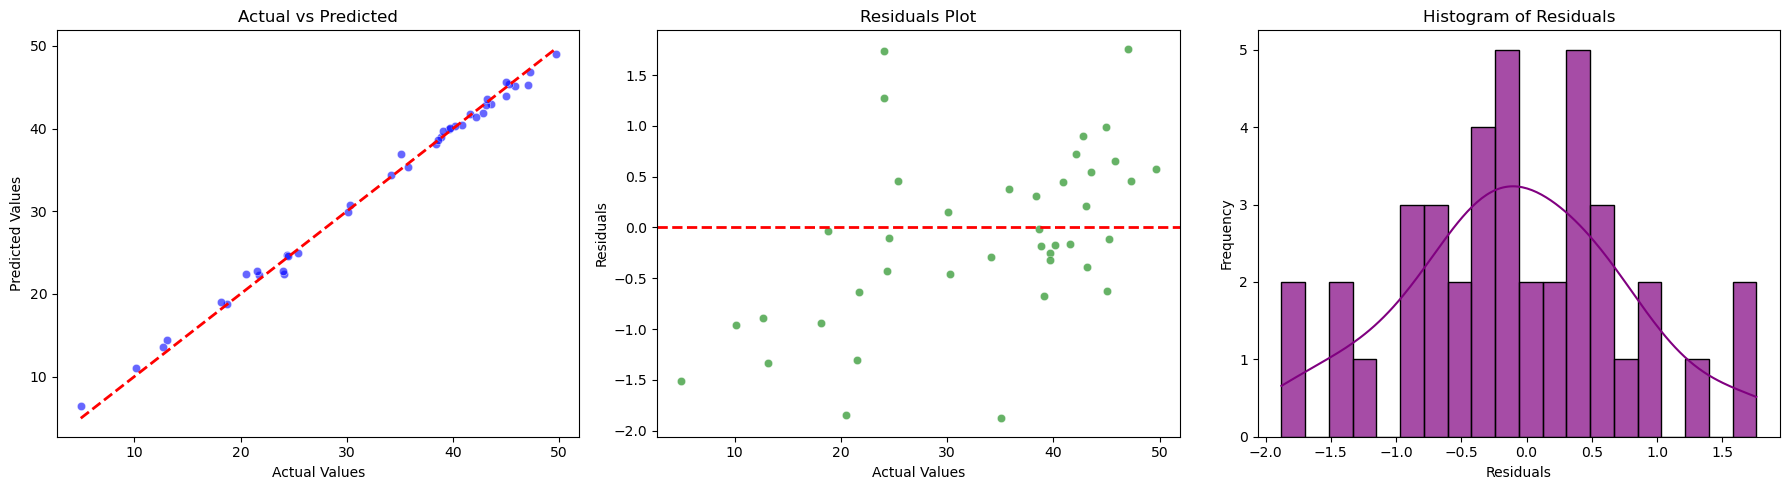

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Calculate residuals
residuals = y_test - y_pred2

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred2, ax=axes[0], color="blue", alpha=0.6)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="dashed", linewidth=2)
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Residuals Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[1], color="green", alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle="dashed", linewidth=2)
axes[1].set_title("Residuals Plot")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Residuals")

# Histogram of Residuals
sns.histplot(residuals, bins=20, kde=True, ax=axes[2], color="purple", alpha=0.7)
axes[2].set_title("Histogram of Residuals")
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In the visualizations above we can asses the residual values of the model.

First look the actual vs. predicted values on the left. Here we see that the model is a good fit for the data because the blue dots all live close, almost all on, on the red perfect model prediction line. It's a tight spread, so tellus us that our model makes good predictions.

Next looking at the residual plot in the middle we see that there is no real discernible pattern to the points and they are scattered around 0 which means that the errors are independent.

Finally look at the histogram of residuals on the right. We see a bell-shaped curve centered around 0 which tells us that the model’s errors are evenly and normally distributed; there is no systematic bias and the model is just making random errors not systematic ones.

Together these all tell us that our model does in fact do an excellent job at fitting the dataset! Now that we can say our model is a good fit for the data we can investigate what variables came out as key features in optimizing VMG. 

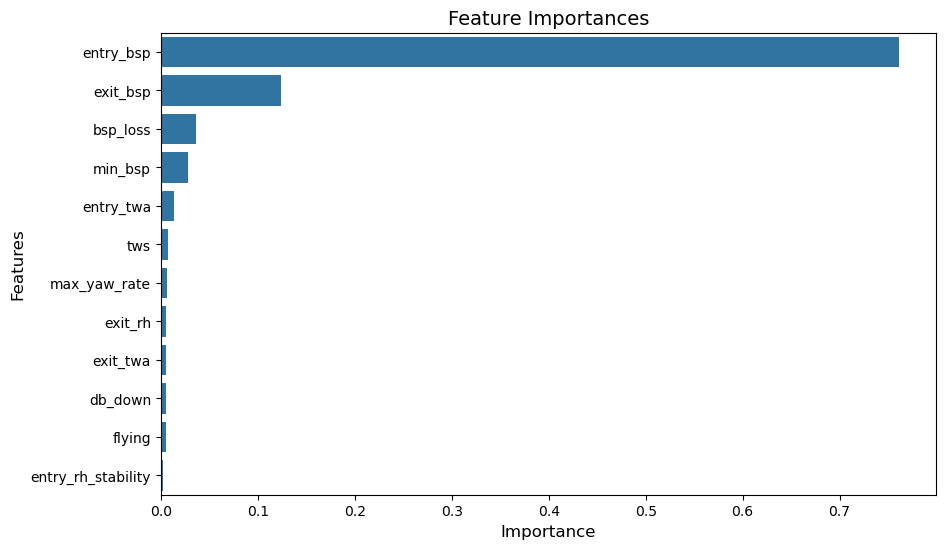

,Feature,Importance
11,entry_bsp,0.761060
10,exit_bsp,0.123552
9,bsp_loss,0.035817
8,min_bsp,0.028495
7,entry_twa,0.013242
6,tws,0.007228
5,max_yaw_rate,0.006484
4,exit_rh,0.005625
3,exit_twa,0.005574
2,db_down,0.005171


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a table for feature importances
feature_importances = pd.DataFrame({
    'Feature': [X.columns[i] for i in indices],
    'Importance': importances[indices]
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 


# Feature Importances Bar Plot
fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axis

sns.barplot(
    y=feature_importances['Feature'], 
    x=feature_importances['Importance'], 
    ax=ax
)

# Labels and title
ax.set_title("Feature Importances", fontsize=14)
ax.set_xlabel("Importance", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

plt.show()
feature_importances


The final model says that the key features of a tack when optimizing for VMG(in order of importance) are:
1. Entry boat speed 
    * Strongest impact on the VMG of a tack 
    * .836 more weigh than the 2nd more important
    * More entry boat speed leads to better vmg out of tack
2. Exit boat speed 
    * Seconds strongest impact on VMG 
    * Slight more weight than the rest of the factors as well (.08 more than bsp loss)
    * More exit speed means better VMG 
3. Minimum boat speed loss 
    * Higher minimum boat speed loss(less boat speed lost) 
4. Minimum boat speed
    * Higher minimum boat speed 
5. Entry TWA
    * Slightly higher TWA into the tack 
6. TWS
    * When the TWS is higher it slightly contributes to higher VMG 
7. Max yaw rate
    * More max yaw
8. Exit ride height 
    * Higher ride height on the exit 
9. DB down
    * More DB down 
10. If the boat was flying or not 
    * When the boat is flying vs. not flying it sees better VMG
11. Exit TWA
    *  Higher angle on the exit
12. Entry ride height stability 
    * More stable ride height on the entry 

The features of a tack that saw the most weight when optimizing for VMG all relate to boat speed: entry boat speed, exit boat speed, boat speed loss, minimum boat speed. This tells us that more speed means more VMG out of tack. Specifically, more speed in and out and a higher minimum speed during the maneuver all lead to a more optimal VMG. 


## Question 8: Give insights on the racing on what made a team win or underperform in the race.

### Process

To gain insight into what made a team win or underperform in a race we can breakdown a race into three different parts
1. overall summary statistics
2. the start
3. race legs

We can then compare the performance of the top 3 and bottom 3 finishers at each of these stages to see what contribued to winning and underperforming. 

Let's take *Race 6* at the *2025 SailGP Auckland Event* and analyze it.

### Race Info

**Event**: SailGP Auckland 2025

**Race**: 6

**Start Local Time**: 16:29:00

**Top 3 Finishers**: DEN, AUS, ESP

**Bottom 3 Finishers**: USA, ITA, SUI

##### Below is all the code for creating table and visualizations for analysis

In [45]:
###Setup Code
import pandas as pd

AUS = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_AUS.csv')
BRA = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_BRA.csv')
CAN = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_CAN.csv')
DEN = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_DEN.csv')
ESP = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_ESP.csv')
GBR = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_GBR.csv')
GER = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_GER.csv')
ITA = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_ITA.csv')
NZL = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_NZL.csv')
SUI = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_SUI.csv')
USA = pd.read_csv('SGP_Data_Challenge/Data/Boat_logs/data_USA.csv')

all_boats = [AUS, BRA, CAN, DEN, ESP, GBR, GER, ITA, NZL, SUI, USA]

# Add the 'BOAT' column to each dataset to identify the boat
boat_names = ['AUS', 'BRA', 'CAN', 'DEN', 'ESP', 'GBR', 'GER', 'ITA', 'NZL', 'SUI', 'USA']
for boat_name, boat_data in zip(boat_names, all_boats):
    boat_data['BOAT'] = boat_name  # Add the boat name as a new column

# Combine all datasets into one giant dataset and filter for just race 6
combined_data = pd.concat(all_boats, ignore_index=True)
race6 = combined_data[(combined_data['TRK_RACE_NUM_unk'] == 25011906.0)]


#Add a column for finish place
race6_leg7 = race6[(race6['TRK_LEG_NUM_unk'] == 7)] 
race6_leg7.loc[:, 'TIME_LOCAL_unk'] = pd.to_datetime(race6_leg7['TIME_LOCAL_unk'])# Convert 'TIME_LOCAL_unk' to datetime
finish_order = race6_leg7.groupby('BOAT')['TIME_LOCAL_unk'].max().reset_index() # Group by 'BOAT' and get the most last timestamp for each boat
finish_order = finish_order.sort_values(by='TIME_LOCAL_unk', ascending=True) # Sort the last entry timestamps from least to most recent 
finish_order["FINISH"] = finish_order["TIME_LOCAL_unk"].rank(method="dense", ascending=True).astype(int) #add column for finish

In [46]:
# Setup for Summary Table
# Make a table for entire race with the columns I want and add RANK and FINISH columns
all_legs_df = []

# Iterate over each leg (1 to 7)
for leg_num in range(1, 8):
    # Filter the data for the current leg and selected boats
    leg = race6[(race6['TRK_LEG_NUM_unk'] == leg_num) & 
                (race6['BOAT'].isin(['DEN', 'AUS', 'ESP', 'USA', 'ITA', 'SUI']))]
    
    # Select relevant columns
    race_vars = [
        "BOAT", "BOAT_SPEED_km_h_1", "HEADING_deg", "ANGLE_CA1_deg", "ANGLE_CA2_deg", "ANGLE_CA3_deg",
        "ANGLE_CA4_deg", "ANGLE_CA5_deg", "ANGLE_CA6_deg", "ANGLE_WING_TWIST_deg", "ANGLE_WING_ROT_deg",
        "PITCH_deg", "HEEL_deg", "LENGTH_RH_P_mm", "LENGTH_RH_S_mm", "LENGTH_RH_BOW_mm", "ANGLE_RUDDER_deg",
        "ANGLE_DB_RAKE_P_deg", "ANGLE_DB_RAKE_S_deg", "ANGLE_DB_CANT_P_deg", "ANGLE_DB_CANT_S_deg", "TRK_LEG_NUM_unk"
    ]
    
    df_leg = leg[race_vars]
    df_leg_avgs = df_leg.groupby('BOAT').mean(numeric_only=True).reset_index()  # Averages for each boat in the leg
    
    # Get the time for the current leg's boats to compute the ranking
    rank = combined_data[(combined_data['TRK_RACE_NUM_unk'] == 25011906.0) & (combined_data['TRK_LEG_NUM_unk'] == leg_num)]
    rank.loc[:, 'TIME_LOCAL_unk'] = pd.to_datetime(rank['TIME_LOCAL_unk'])
    rank = rank.groupby('BOAT')['TIME_LOCAL_unk'].max().reset_index()
    rank = rank.sort_values(by='TIME_LOCAL_unk', ascending=True)
    rank["RANK"] = rank["TIME_LOCAL_unk"].rank(method="dense", ascending=True).astype(int)
    
   
    df_leg_avgs = df_leg_avgs.merge(rank[["BOAT", "RANK"]], on="BOAT") # Merge rank with the leg's averaged dataframe
    df_leg_avgs = df_leg_avgs.merge(finish_order[["BOAT", "FINISH"]], on="BOAT") # Add race finish information
    df_leg_avgs = df_leg_avgs.sort_values(by="RANK")     # Sort by rank for the current leg
    all_legs_df.append(df_leg_avgs)    # Append the current leg's dataframe to the list of all legs


race6_avgs = pd.concat(all_legs_df, ignore_index=True) # Combine all the leg data into one big table
race6_avgs = race6_avgs.sort_values(by=['BOAT', 'TRK_LEG_NUM_unk']) # Sort by 'BOAT' and 'TRK_LEG_NUM_unk' to ensure correct order
race6_avgs['RANK GAIN'] = race6_avgs.groupby('BOAT')['RANK'].diff().fillna(0).astype(int) # Calculate 'RANK GAIN' by comparing the current leg's rank to the previous leg's rank
race6_avgs['RANK GAIN'] = race6_avgs.apply(lambda row: 0 if row['RANK GAIN'] == 0 and row['TRK_LEG_NUM_unk'] > 1 else row['RANK GAIN'], axis=1) # If the rank is the same between consecutive legs, set 'RANK GAIN' to 0

# Function to make an averages table 
def race_averages(df, boat_ids):
    # Filter data for the specified boats
    # df = df[df['BOAT'].isin(boat_ids)]
    
    result = []

    for boat in boat_ids:
        boat_data = df[df['BOAT'] == boat]
        
        # Calculate SPEED AVG
        legs = [1, 2, 3, 4, 5, 6, 7]
        speed_avg = boat_data[boat_data['TRK_LEG_NUM_unk'].isin(legs)]['TWS_SGP_km_h_1'].mean()

        # Calculate TOTAL TIME
        first_time_leg1 = boat_data[boat_data['TRK_LEG_NUM_unk'] == 1]['TIME_LOCAL_unk'].min()
        last_time_leg7 = boat_data[boat_data['TRK_LEG_NUM_unk'] == 7]['TIME_LOCAL_unk'].max()
        total_time = pd.to_datetime(last_time_leg7) - pd.to_datetime(first_time_leg1)
        
        # Calculate TIME UPWIND (legs 1, 3, 5)
        upwind_legs = [1, 3, 5]
        time_upwind = boat_data[boat_data['TRK_LEG_NUM_unk'].isin(upwind_legs)]
        time_upwind_diff = pd.to_datetime(time_upwind['TIME_LOCAL_unk']).max() - pd.to_datetime(first_time_leg1)
        
        # Calculate TIME DOWNWIND (legs 2, 4, 6)
        downwind_legs = [2, 4, 6]
        time_downwind = boat_data[boat_data['TRK_LEG_NUM_unk'].isin(downwind_legs)]
        time_downwind_diff = pd.to_datetime(time_downwind['TIME_LOCAL_unk']).max() - pd.to_datetime(first_time_leg1)
        
        # Calculate TIME REACH (legs 1 and 7)
        reach_legs = [1, 7]
        time_reach = boat_data[boat_data['TRK_LEG_NUM_unk'].isin(reach_legs)]
        time_reach_diff = pd.to_datetime(time_reach['TIME_LOCAL_unk']).max() - pd.to_datetime(first_time_leg1)
        
        # Calculate SPEED UPWIND (legs 3, 5)
        upwind_speeds = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([3, 5])]['TWS_SGP_km_h_1']
        speed_upwind = upwind_speeds.mean()
        
        # Calculate SPEED DOWNWIND (legs 2, 4, 6)
        downwind_speeds = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([2, 4, 6])]['TWS_SGP_km_h_1']
        speed_downwind = downwind_speeds.mean()
        
        # Calculate SPEED REACH (legs 1 and 7)
        reach_speeds = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([1, 7])]['TWS_SGP_km_h_1']
        speed_reach = reach_speeds.mean()
        
        # Calculate HEADING UPWIND (legs 3, 5)
        upwind_heading = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([3, 5])]['HEADING_deg']
        heading_upwind = upwind_heading.mean()
        
        # Calculate HEADING DOWNWIND (legs 2, 4, 6)
        downwind_heading = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([2, 4, 6])]['HEADING_deg']
        heading_downwind = downwind_heading.mean()
        
        # Calculate HEADING REACH (legs 1 and 7)
        reach_heading = boat_data[boat_data['TRK_LEG_NUM_unk'].isin([1, 7])]['HEADING_deg']
        heading_reach = reach_heading.mean()

        # Format time columns as HH:MM:SS (remove day part)
        total_time_str = str(total_time).split(" ")[-1]  # Get time part after the day
        time_upwind_str = str(time_upwind_diff).split(" ")[-1]
        time_downwind_str = str(time_downwind_diff).split(" ")[-1]
        time_reach_str = str(time_reach_diff).split(" ")[-1]
        
        # Combine
        result.append({
            'BOAT': boat,
            'SPEED AVG': speed_avg,
            'TIME UPWIND': time_upwind_str,
            'TIME DOWNWIND': time_downwind_str,
            'TIME REACH': time_reach_str,
            'SPEED UPWIND': speed_upwind,
            'SPEED DOWNWIND': speed_downwind,
            'SPEED REACH': speed_reach,
            'HEADING UPWIND': heading_upwind,
            'HEADING DOWNWIND': heading_downwind,
            'HEADING REACH': heading_reach
        })

    result_df = pd.DataFrame(result)

    return result_df

boat_ids = ["DEN", "AUS", "ESP", "USA", "ITA", "SUI"]
summary = race_averages(race6, ['DEN', 'AUS', 'ESP', 'USA', 'ITA', 'SUI'])
summary = summary.merge(finish_order[["BOAT", "FINISH"]], on="BOAT")

In [50]:
# Setup for Maneuver table 
mans = pd.read_csv('SGP_Data_Challenge/Data/2025-01-19_man_summary.csv')
mans_race6 = mans[mans["race"] == 6]
mans_race6 = mans_race6[mans_race6["BOAT"].isin(["DEN", "AUS", "ESP", "USA", "ITA", "SUI"])]

mans_race6 = mans_race6[mans_race6["BOAT"].isin(["DEN", "AUS", "ESP", "USA", "ITA", "SUI"])]

# Grouping by BOAT and aggregating over all legs
man_summary = mans_race6.groupby("BOAT").agg(
    N_MANUVER=("type", "count"),
    N_MANUVER_tacks=("type", lambda x: (x == "tack").sum()),
    Num_gybes=("type", lambda x: (x == "gybe").sum()),
    Boat_speed_loss_tacks=("bsp_loss", lambda x: x[mans_race6["type"] == "tack"].mean()),
    Boat_speed_loss_gybes=("bsp_loss", lambda x: x[mans_race6["type"] == "gybe"].mean()),
).reset_index()

man_summary = man_summary.merge(finish_order[["BOAT", "FINISH"]], on="BOAT")

In [54]:
# Making Start Table
import pandas as pd
import folium
from IPython.display import display



start = combined_data[
    (combined_data['BOAT'].isin(['DEN', 'AUS', 'ESP', 'USA', 'ITA', 'SUI'])) &
    (combined_data['TIME_LOCAL_unk'] == '2025-01-19 16:29:00')
] # Filter for start time 

selected_columns = [
    'BOAT',  
    'PC_TTS_s', 
    'PC_DTL_m', 
    'BOAT_SPEED_km_h_1',
    'ANGLE_WING_TWIST_deg', 
    'TWA_SGP_deg', 
    'PITCH_deg', 
    'HEEL_deg', 
    'LENGTH_RH_P_mm', 
    'LENGTH_RH_S_mm', 
    'LENGTH_RH_BOW_mm', 
    'ANGLE_RUDDER_deg', 
    'ANGLE_DB_RAKE_P_deg', 
    'ANGLE_DB_RAKE_S_deg', 
    'ANGLE_DB_CANT_P_deg', 
    'ANGLE_DB_CANT_S_deg'
]

start = start[selected_columns]
start['BOAT'] = pd.Categorical(start['BOAT'], categories=['DEN', 'AUS', 'ESP', 'USA', 'ITA', 'SUI'], ordered=True)
start = start.merge(finish_order[["BOAT", "FINISH"]], on="BOAT")


# Make map with start positions 
df = combined_data[
    (combined_data['BOAT'].isin(['DEN', 'AUS', 'ESP', 'USA', 'ITA', 'SUI'])) &
    (combined_data['TIME_LOCAL_unk'] == '2025-01-19 16:29:00')
]


# Define colors for each boat
boat_colors = {
    'DEN': 'red',
    'AUS': 'yellow',
    'ESP': 'orange',
    'USA': 'blue',
    'ITA': 'green',
    'SUI': 'black'
}

# Function to add a custom legend to the map
def add_legend(map_obj):
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 80px; height: 200; 
                border: 2px solid black; padding: 10px; z-index: 9999; font-size: 8px;">  
        <strong>Boat Legend</strong><br>
    """
    
    # Add each boat and its color to the legend
    for boat, color in boat_colors.items():
        legend_html += f'<i style="background-color:{color}; width: 20px; height: 20px; display: inline-block;"></i> {boat}<br>'
    
    legend_html += "</div>"
    
    # Add the legend to the map
    map_obj.get_root().html.add_child(folium.Element(legend_html))

# Create a base map centered around the first boat
initial_location = [df['LATITUDE_GPS_unk'].iloc[0], df['LONGITUDE_GPS_unk'].iloc[0]]
m = folium.Map(location=initial_location, zoom_start=20)

# Loop through each boat and plot only the last recorded coordinate
for boat, color in boat_colors.items():
    boat_df = df[df['BOAT'] == boat]
    
    if not boat_df.empty:
        # Get the last recorded coordinate
        last_row = boat_df.iloc[-1]
        folium.CircleMarker(
            location=[last_row['LATITUDE_GPS_unk'], last_row['LONGITUDE_GPS_unk']],
            radius=8,  # Adjust size as needed
            color=color, fill=True, fill_color=color, fill_opacity=0.9,
            popup=f"{boat}"  # Optional popup with boat name
        ).add_to(m)

add_legend(m)

# Save map
m.save('boats_last_positions.html')

# Add SL1 and SL2 as squares
sl_points = [
    {"name": "SL1", "lat": -36.8345570, "lng": 174.7699860},
    {"name": "SL2", "lat": -36.8352420, "lng": 174.7677960}
]

for point in sl_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m)

# Save and display the updated map
m.save('boats_last_positions_with_SL.html')


In [56]:
# For all legs
# Put through table that find the averages for the race and filter for each leg & then make a table for making map that has timestamps & coordinates
# leg1
leg1 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 1]
leg1 = leg1.sort_values(by=['FINISH'])
df1 = race6[race6['TRK_LEG_NUM_unk'] == 1]

# leg2
leg2 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 2]
leg2 = leg2.sort_values(by=['FINISH'])
df2 = race6[race6['TRK_LEG_NUM_unk'] == 2]

# leg3
leg3 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 3]
leg3 = leg3.sort_values(by=['FINISH'])
df3 = race6[race6['TRK_LEG_NUM_unk'] == 3]

# leg4
leg4 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 4]
leg4 = leg4.sort_values(by=['FINISH'])
df4 = race6[race6['TRK_LEG_NUM_unk'] == 4]

# leg5
leg5 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 5]
leg5 = leg5.sort_values(by=['FINISH'])
df5 = race6[race6['TRK_LEG_NUM_unk'] == 5]

# leg6
leg6 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 6]
leg6 = leg6.sort_values(by=['FINISH'])
df6 = race6[race6['TRK_LEG_NUM_unk'] == 6]

# leg7
leg7 = race6_avgs[race6_avgs["TRK_LEG_NUM_unk"] == 7]
leg7 = leg7.sort_values(by=['FINISH'])
df7 = race6[race6['TRK_LEG_NUM_unk'] == 7]

In [ ]:
# for graphing every leg
from folium import plugins

# List of boats and corresponding colors for each boat
boat_colors = {
    'DEN': 'red',
    'AUS': 'yellow',
    'ESP': 'orange',
    'USA': 'blue',
    'ITA': 'green',
    'SUI': 'black'
}

# Mark 1
M_points = [
    {"name": "M1", "lat": -36.8297130, "lng": 174.7652700},
]
# LGs
LG_points = [
    {"name": "LG1", "lat": -36.8345760, "lng": 174.7559700},
    {"name": "LG2", "lat": -36.8329760, "lng": 174.7537780},
]
LG1_points = [
    {"name": "LG1", "lat": -36.8345760, "lng": 174.7559700},
]
# WGs
WG_points = [
    {"name": "WG1", "lat": -36.8304300, "lng": 174.7684010},
    {"name": "WG2", "lat": -36.8290160, "lng": 174.7676510},
]

# Finish Line
FL_points = [
    {"name": "FL1", "lat": -36.8362730, "lng": 174.7580790},
    {"name": "FL2", "lat": -36.8354260, "lng": 174.7590550},
]

# Function to add a custom legend to the map
def add_legend(map_obj):
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 80px; height: 200; 
                border: 2px solid black; padding: 10px; z-index: 9999; font-size: 8px;">  
        <strong>Boat Legend</strong><br>
    """
    
    # Add each boat and its color to the legend
    for boat, color in boat_colors.items():
        legend_html += f'<i style="background-color:{color}; width: 20px; height: 20px; display: inline-block;"></i> {boat}<br>'
    
    legend_html += "</div>"
    
    # Add the legend to the map
    map_obj.get_root().html.add_child(folium.Element(legend_html))

# Leg 1
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df1[df1['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m1 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m1)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m1)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m1.save(map_filename)

        from IPython.display import display
        
# Add mark1
for point in M_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m1)

# Save and display the updated map
m1.save('boats_last_positions_with_SL.html')

# Leg 2
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df2[df2['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m2 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m2)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m2)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m2.save(map_filename)

        from IPython.display import display

for point in LG_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m2)

# Save and display the updated map
m2.save('boats_last_positions_with_SL.html')

# Leg 3
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df3[df3['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m3 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m3)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m3)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m3.save(map_filename)

        from IPython.display import display

for point in WG_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m3)



# Leg 4
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df4[df4['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m4 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m4)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m4)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m4.save(map_filename)

        from IPython.display import display
        
for point in LG_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m4)


# Leg 5
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df5[df5['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m5 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m5)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m5)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m5.save(map_filename)

        from IPython.display import display
        
for point in WG_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m5)

# Leg 6
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df6[df6['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m6 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m6)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m6)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m6.save(map_filename)

        from IPython.display import display
        
for point in LG1_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m6)


# Leg 7
for leg_num in range(1, 8):
    # Filter the dataframe for the current TRK_LEG_NUM_unk
    leg_data = df7[df7['TRK_LEG_NUM_unk'] == leg_num]

    # If the filtered data for the leg is not empty
    if not leg_data.empty:
        # Create a new map for this leg
        initial_location = [leg_data['LATITUDE_GPS_unk'].iloc[0], leg_data['LONGITUDE_GPS_unk'].iloc[0]]
        m7 = folium.Map(location=initial_location, zoom_start=16)

        # Iterate over each boat in the boat_colors dictionary
        for boat, color in boat_colors.items():
            boat_data = leg_data[leg_data['BOAT'] == boat]  # Filter data for the boat

            if not boat_data.empty:
                # Add the path for the boat (connecting the coordinates with a line)
                for i in range(1, len(boat_data)):
                    folium.PolyLine(
                        locations=[[boat_data.iloc[i-1]['LATITUDE_GPS_unk'], boat_data.iloc[i-1]['LONGITUDE_GPS_unk']], 
                                   [boat_data.iloc[i]['LATITUDE_GPS_unk'], boat_data.iloc[i]['LONGITUDE_GPS_unk']]],
                        color=color, weight=2.5, opacity=0.7
                    ).add_to(m7)

            else:
                print(f"No data found for boat {boat} in leg {leg_num}")

        # Add the custom legend to the map
        add_legend(m7)

        # Save the map to an HTML file, naming it by leg number
        map_filename = f'path_map_leg_{leg_num}.html'
        m7.save(map_filename)

for point in FL_points:
    folium.Marker(
        location=[point["lat"], point["lng"]],
        icon=folium.Icon(color="gray", icon="stop", prefix="fa"),
        popup=point["name"]
    ).add_to(m7)

## Summary Statistics 

#### Table 1: Race Averages

In [58]:
summary

,BOAT,SPEED AVG,TIME UPWIND,TIME DOWNWIND,TIME REACH,SPEED UPWIND,SPEED DOWNWIND,SPEED REACH,HEADING UPWIND,HEADING DOWNWIND,HEADING REACH,FINISH
0,DEN,37.144323,00:07:17,00:08:35,00:08:58,38.816576,36.010936,33.667234,69.428599,246.075872,224.398723,1
1,AUS,37.259051,00:07:04,00:08:47,00:09:08,38.156174,36.350539,36.843023,73.780644,239.400747,229.446279,2
2,ESP,36.807226,00:07:12,00:08:41,00:09:07,37.400354,36.591162,34.947170,83.833031,241.098506,227.132830,3
3,USA,38.607952,00:07:53,00:09:16,00:09:40,38.115512,39.781762,35.884815,68.973534,243.371434,226.592593,8
4,ITA,36.123424,00:07:50,00:09:17,00:09:47,36.154854,36.336786,35.058519,81.510162,237.636205,217.132778,9
5,SUI,36.221275,00:08:03,00:09:30,00:09:55,36.319091,36.442741,34.521373,72.499564,237.418370,221.992353,10


**Comments**

The first thing that stands out here is that USA had the highest average speed for the entire race, but finished 9th overall. If we look closer this can be attributed to donwind where they see 3kmph more of speed that the rest of the fleet. 

#### Table 2: Maneuver Averages

In [60]:
man_summary

,BOAT,N_MANUVER,N_MANUVER_tacks,Num_gybes,Boat_speed_loss_tacks,Boat_speed_loss_gybes,FINISH
0,AUS,9,6,3,20.036667,23.646667,2
1,DEN,8,4,4,23.540000,27.360000,1
2,ESP,9,4,5,18.000000,25.968000,3
3,ITA,8,5,3,23.074000,20.756667,9
4,SUI,8,3,5,24.246667,23.158000,10
5,USA,9,4,5,16.630000,27.754000,8


**Comments**

## Start

#### Position After Start and Start Data

In [66]:
display(m)

#### Comments

## Race Legs

###### Setup Code

### Leg 1

##### **Track Image and Leg Averages Table**

In [ ]:
display(m1)
leg1

#### Comments

### Leg 2

##### **Track Image and Leg Averages Table**

In [ ]:
display(m2)
leg2

### Leg 3

##### **Track Image and Leg Averages Table**

In [ ]:
display(m3)
leg3

#### Comments

### Leg 4

##### **Track Image and Leg Averages Table**

In [ ]:
display(m4)
leg4

#### Comments

### Leg 5

##### **Track Image and Leg Averages Table**

In [ ]:
display(m5)
leg5

#### Comments

### Leg 6

##### **Track Image and Leg Averages Table**

In [ ]:
display(m6)
leg6

#### Comments

### Leg 7

##### **Track Image and Leg Averages Table**

In [ ]:
display(m7)
leg7

#### Comments

## Race Conclusions